#**TP3 – Performance d’un classifieur**

**Réalisé par : BENSLIMANE Zahra**

Chargé de TP : Flavien Lebrun

Chargée de cours : Catrine Achard


**Résumé :** L'objective du TP est de détecter des pixels de teinte chaire afin
d’accélérer un algorithme de détection de visages. Pour cela on va travailler avec les images de la base Pratheepan Dataset (W.R. Tan, C.S. Chan, Y. Pratheepan
and J. Condell (2012) "A Fusion Approach for Efficient Human Skin Detection", IEEE
Transactions on Industrial Informatics) 



##**I. Chargement et visualisation des données**

In [7]:
# Chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
import math

On a récupéré dans X_train, y_train, les pixels des 26 premières images et
dans X_test, y_test, ceux des 4 dernières images. Seul un pixel sur 2000 a été conservé pour
avoir des temps de calcul raisonnables. X_ est composé des composantes chromatiques Cb, Cr
de chaque pixel et y_ est composé de la classe du pixel, 1 si couleur peau, 0 sinon

<function matplotlib.pyplot.show>

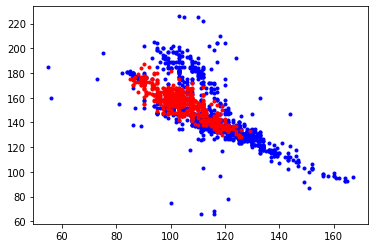

In [8]:
#Observer les images dans l’explorateur de fichier puis charger les données et visualiser les points de chaque class
[X_train, y_train, X_test, y_test] = np.load('TP3.npy',allow_pickle=True)
#Pixel peau
T_train = X_train[np.where(y_train==1),:]
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] ))
#Pixel non peau
F_train = X_train[np.where(y_train==0),:]
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] ))
plt.plot(F_train[:,0], F_train[:,1], '.b')
plt.show
plt.plot(T_train[:,0], T_train[:,1], '.r')
plt.show



Questions
Combien y a-t-il de pixels de teinte chaire ? de teinte non chaire ? Quelle est la dimension des
données ?

In [9]:
print("X_train.shape = ", X_train.shape )
print("y_train.shape = ",y_train.shape)
print("X_test.shape = ", X_test.shape)
print("y_test.shape = ",y_test.shape)

print("\nT_train.shape = ",T_train.shape, "#Pixel peau : Deux composantes Cb et Cr")
print("F_train.shape = ",F_train.shape , "#Pixel non peau : : Deux composantes Cb et Cr")

print("\nNombre de pixels de la classe chaire : ",T_train.shape[0])
print("Nombre de pixels de la classe non chaire : ", F_train.shape[0])

print("La dimension des données = ", 2) # Cb et Cr

X_train.shape =  (2370, 2)
y_train.shape =  (2370,)
X_test.shape =  (284, 2)
y_test.shape =  (284,)

T_train.shape =  (639, 2) #Pixel peau : Deux composantes Cb et Cr
F_train.shape =  (1731, 2) #Pixel non peau : : Deux composantes Cb et Cr

Nombre de pixels de la classe chaire :  639
Nombre de pixels de la classe non chaire :  1731
La dimension des données =  2


 ## **II. Modélisation de la densité de probabilité a priori de la teinte chaire par une loi normale 2D avec des dimensions décorrélées** 

Comme il est difficile de modéliser tout ce qui n’est pas teinte chaire, on décide de travailler
avec une seule classe, la teinte chaire, dont on estime la densité de probabilité a priori.
𝑝(𝒙/𝑐ℎ𝑎𝑖𝑟).

**a. Estimation de la densité de probabilité a priori des pixels de teinte chaire**

On modélise la densité de probabilité a priori des pixels de teinte chaire 𝑝(𝒙/𝑐ℎ𝑎𝑖𝑟), 𝒙 = [
𝐶𝑏
𝐶𝑟]
sur la base d’apprentissage par une loi normale 2D avec des dimensions décorrélées :

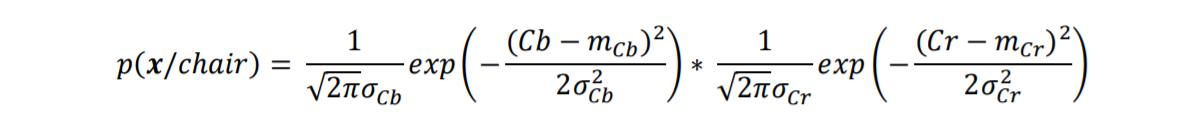


Où 𝑚Cb, 𝑚Cr, 𝜎Cb, 𝜎Cr représentent les moyennes et écarts-type de chacune des composantes.
Déterminer 𝑚Cb, 𝑚Cr, 𝜎Cb, 𝜎Cr.


Utiliser la fonction norm1(𝑥, 𝑚, 𝜎) pour estimer la probabilité de tous les pixels de la base
d’apprentissage X_train d’appartenir à la teinte chaire :
𝑝 ([
𝐶𝑏
𝐶𝑟] /𝑐ℎ𝑎𝑖𝑟) =norm1(𝐶𝑏, 𝑚Cb, 𝜎Cb) * norm1(𝐶𝑟, 𝑚Cr, 𝜎Cr)
On stockera ces valeurs dans un vecteur p1_train.


**Questions**


Quelle est la dimension de 𝑚Cb, 𝑚Cr, 𝜎Cb, 𝜎Cr ?


Pour un pixel 𝒙 de teinte chaire donnée, quelle est la dimension de 𝑝(𝒙/𝑐ℎ𝑎𝑖𝑟) ?


Quelle est la dimension du vecteur p1_train ?


Quelle hypothèse nous permet d’estimer la valeur de la loi normale à partir de l’équation
précédente ?



In [10]:
𝑚Cb = np.mean(T_train[:,0])    # moyennes et écarts-type de la composante Cb
𝑚Cr = np.mean(T_train[:,1])    # moyennes et écarts-type de la composante Cr

𝜎Cb = np.std(T_train[:,0])     # écarts-type de la composante Cb
𝜎Cr = np.std(T_train[:,1])     # écarts-type de la composante Cr

print("Les moyennes :\n𝑚Cb = ", 𝑚Cb, "\n𝑚Cr = ",𝑚Cr,"\nLes écarts-types :\n𝜎Cb = ",𝜎Cb,"\n𝜎Cr = ",𝜎Cr  )
print("La dimension de 𝑚Cb, 𝑚Cr, 𝜎Cb, 𝜎Cr est de 1")

def norm1(x, m, s):
  p = 1/(math.sqrt(2*math.pi)*s)*math.exp(-(x-m)*(x-m)/(2*s*s))
  return p


Les moyennes :
𝑚Cb =  104.29577464788733 
𝑚Cr =  155.19405320813772 
Les écarts-types :
𝜎Cb =  9.067914388009926 
𝜎Cr =  11.607693835769547
La dimension de 𝑚Cb, 𝑚Cr, 𝜎Cb, 𝜎Cr est de 1


In [11]:
#estimer la probabilité de tous les pixels de la base d’apprentissage X_train d’appartenir à la teinte chaire  pour chaque exemple
p1_train = [] # On stockera ces valeurs dans un vecteur p1_train
for i in range(T_train.shape[0]):
  p1_train.append(norm1(T_train[i ,0], 𝑚Cb, 𝜎Cb) * norm1(T_train[i , 1], 𝑚Cr, 𝜎Cr)) #𝑝 ([𝐶𝑏;𝐶𝑟] /𝑐ℎ𝑎𝑖𝑟)
#print("\np1_train = ", p1_train)
print("len(p1_train) = ", len(p1_train) )
print("\nPour un pixel 𝒙 de teinte chaire donnée, la dimension de 𝑝(𝒙/𝑐ℎ𝑎𝑖𝑟) est de : 1")
print("La dimension du vecteur p1_train = ",len(p1_train))

print("Pour faire le produit des probabilités, on considère que les classes sont indépendantes.")

len(p1_train) =  639

Pour un pixel 𝒙 de teinte chaire donnée, la dimension de 𝑝(𝒙/𝑐ℎ𝑎𝑖𝑟) est de : 1
La dimension du vecteur p1_train =  639
Pour faire le produit des probabilités, on considère que les classes sont indépendantes.


**b. Classification**

Afin de classer les pixels de test X_test comme teinte chaire ou non, on estime la valeur de
𝑝(𝒙/𝑐ℎ𝑎𝑖𝑟) en ces points que l’on stocke dans P1_test. Pour réaliser la classification, on seuille
P1_test en utilisant comme seuil initial la valeur moyenne de P1_train.

Sur la base de test, estimer :

*   TP : le nombre de vrai positif
*   TN : le nombre de vrai négatif
*   FP : le nombre de faux positif
*   FN : le nombre de faux négatif


puis la sensibilité et la spécificité. Quel est le taux de bonne reconnaissance ?

In [12]:
print("X_test.shape = ", X_test.shape)
print("y_test.shape = ",y_test.shape)
# Estimation de la la valeur de 𝑝(𝒙/𝑐ℎ𝑎𝑖𝑟) des points test 
p1_test = []
for i in range(X_test.shape[0]):
  p1_test.append(norm1(X_test[i ,0], 𝑚Cb, 𝜎Cb) * norm1(X_test[i , 1], 𝑚Cr, 𝜎Cr)) 
print("p1_test.shape = ",len(p1_test))

X_test.shape =  (284, 2)
y_test.shape =  (284,)
p1_test.shape =  284


In [13]:
def classifyData(estimatedProba,threshold) :
  binaryClassif = []
  for i in range(len(estimatedProba)):
    binaryClassif.append(1) if estimatedProba[i] >= threshold else binaryClassif.append(0)
  return binaryClassif

In [14]:
# Classification : On seuille P1_test : Binarisation 
seuil_Initial = np.mean(p1_train)  # on seuille P1_test en utilisant comme seuil initial la valeur moyenne de P1_train
print("Le seuil initial = la valeur moyenne de P1_train = ",seuil_Initial )
binaryClassif = classifyData(p1_test,seuil_Initial)
#print(p1_test) #print(binaryClassif)

Le seuil initial = la valeur moyenne de P1_train =  0.00081445019677562


In [15]:
def cf_matrix(y_test, y_predicted):
  # D'apres l'énoncé : y_ test est composé de la classe du pixel, 1 si couleur peau, 0 sinon.
  TP = 0  # True positif couleur Peau détectée peau
  TN = 0  # True négatif : Couleur non peau détectée non peau
  FP = 0  # False positif : Couleur non peau détectée peau
  FN = 0  # False Négatif : Couleur peau détéctée non peau
  # Compute 
  for i in range(len(y_test)):
    if   (y_predicted[i] == 1) and (y_test[i] == 1): TP += 1 
    elif (y_predicted[i] == 0) and (y_test[i] == 0): TN += 1
    elif (y_predicted[i] == 1) and (y_test[i] == 0): FP += 1
    elif (y_predicted[i] == 0) and (y_test[i] == 1): FN += 1
    else :
      print ("Error de binarization")
  return TP,FN,FP,TN

In [16]:

import pandas as pd
import seaborn as sns

def draw_cf_Matrix(TP,FN,FP,TN):
  flatten_cf_matrix = [TP,FN,FP,TN]
  cf_matrix = pd.DataFrame([[TP,FN],[FP,TN]], range(2), range(2))
  print(np.array([[TP,FN],[FP,TN]]).reshape(2,2))

  group_names = ['True Pos','False Neg', 'False Pos','True Neg']
  group_counts = ["{0:0.0f}".format(value) for value in np.array(cf_matrix).flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in flatten_cf_matrix / np.sum(flatten_cf_matrix)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title('Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Classes')
  ax.set_ylabel('Actual Classes ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['True','False'])
  ax.yaxis.set_ticklabels(['True','False'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()


Check if the array lengths are compatible : 
binaryClassification.shape =  284
y_test.shape =  (284,)
-------------------------------------------------
[[ 94  10]
 [ 50 130]]


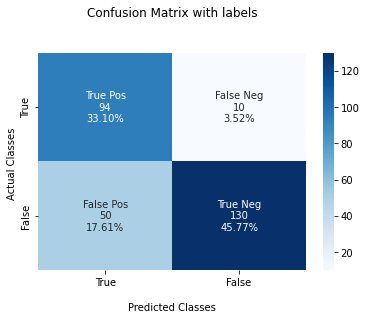

In [17]:
print("Check if the array lengths are compatible : ")
print("binaryClassification.shape = ",len(binaryClassif))
print("y_test.shape = ",y_test.shape)
print("-------------------------------------------------")

# Compute the confusion matrix
[TP,FN,FP,TN] = cf_matrix(y_test, binaryClassif)
draw_cf_Matrix(TP,FN,FP,TN)



### **Precision and recall**

When we have a **class imbalance**, accuracy can become an unreliable metric for measuring our performance.For instance, if we had 99/1 split between two classes, A and B, where the rara event B, is our positive class, we could build a model that was 99% accurate by just saying everything belonged to class A.This problem stems from the fact that true negatives will be very large, and being in the numerator, they will male the results look better then they are.Clearly we should not bother building a model if it doesn't do anythis to identify B. Thus we need different metrics that will discourage this behavior. Fot this, we une precision and recall instead od accuracy.

**Precision** is the ratio of true positives to everything flagged positive 

$precision = TP / (TP+ FP)$

**Recall** : What proportion of actual positives was identified correctly 

$recall = TP/(TP+FN)$

**Taut de bonne classification** = $TP+TN/(TP+TN+FN+FP)$

In [18]:
def ComputeClassifMetrics(TP,FN,FP,TN):
  accuracy = (TP+TN)/(TP+TN+FN+FP)
  presicion = TP/(TP+FP)
  recall = TP/(TP+FN)
  sensibilite = TP/(TP+FN)
  specificite = TN/(FP+TN)
  return accuracy, presicion, recall, sensibilite, specificite

In [19]:
# Comment estimer le rappel et la précision ? 
print("precision = ",TP/(TP+FP) )
print("recall = ", TP/(TP+FN))
# Comment estimer le taux de bonne classification ? 
print("Taut de bonne classification = ", (TP+TN)/(TP+TN+FN+FP))

# Pourquoi avoir choisi ce seuil initial ?

precision =  0.6527777777777778
recall =  0.9038461538461539
Taut de bonne classification =  0.7887323943661971


Figure 2. Increasing classification threshold.

The number of false positives decreases, but false negatives increase. As a result, precision increases, while recall decreases:

Figure 3. Decreasing classification threshold.

False positives increase, and false negatives decrease. As a result, this time, precision decreases and recall increases:

**c. Courbe ROC** 

Plutôt que de choisir un seuil arbitraire, on choisit 20 valeurs de seuil régulièrement réparties
entre min(P1_train) et max(P1_train). Pour chaque valeur de seuil, estimer la précision et le
rappel et tracer la courbe ROC

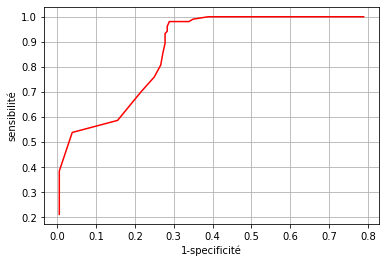

[1.0, 1.0, 1.0, 1.0, 0.9903846153846154, 0.9807692307692307, 0.9807692307692307, 0.9807692307692307, 0.9615384615384616, 0.9423076923076923, 0.9326923076923077, 0.8942307692307693, 0.8557692307692307, 0.8076923076923077, 0.7596153846153846, 0.7019230769230769, 0.5865384615384616, 0.5384615384615384, 0.38461538461538464, 0.21153846153846154]


In [20]:
NB = 20
step = (np.max(p1_train) - np.min(p1_train) ) / NB
SEUILS = np.arange (np.min(p1_train), np.max(p1_train), step)

sensibiliteTab = [] 
specificiteTab = []

# Estimate + binarize + compute the confusion metrix and classification metrics for each threshold
for seuil in SEUILS:
  y_predicted = classifyData(p1_test,seuil)
  [TP,FN,FP,TN] = cf_matrix(y_test, y_predicted)
  #print(TP,FN,FP,TN)
  accuracy, presicion, recall, sensibilite, specificite = ComputeClassifMetrics(TP,FN,FP,TN)
  # Append to array 
  sensibiliteTab.append(sensibilite)
  specificiteTab.append(specificite)

# Compute de 1- specificity for ROC curve
for i in range(np.size(specificiteTab,0)):
  specificiteTab[i]=1-specificiteTab[i]

# Plot the ROC curve
plt.plot(specificiteTab,sensibiliteTab,'r')
plt.xlabel("1-specificité")
plt.ylabel("sensibilité")
plt.grid()
plt.show()

print(sensibiliteTab)

Déterminer sur la courbe ROC le point de fonctionnement tel qu’il y ait autant de faux positifs que de faux négatifs. 

Que vaut le taux de reconnaissance pour ce point ?

## **III. Modélisation de la densité de probabilité a priori de la teinte chaire par une loi normale 2D**

Reprendre la partie II en utilisent une loi normale 2D définie par :
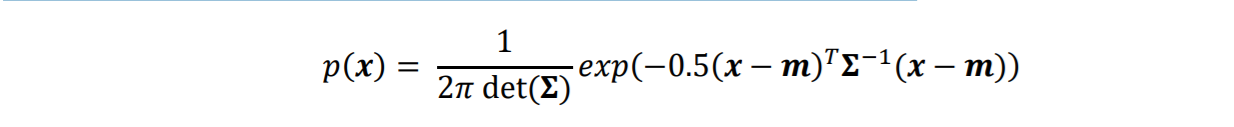

Où 𝒎 et Σ sont les moyenne et matrice de covariance estimées sur les pixels de peau de la base
d’apprentissage. On appellera norm2(𝒙, 𝒎, 𝚺) la fonction qui renvoie la probabilité en un point
𝒙.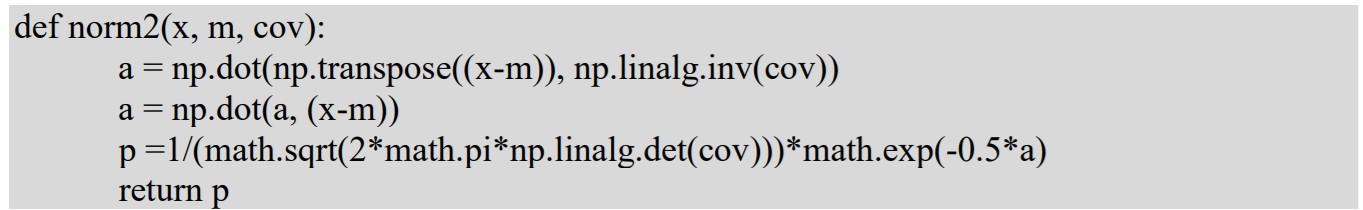

Tracer la nouvelle courbe ROC et comparer les deux modélisations de la densité de
probabilité.

In [21]:
# Fonction qui renvoie la probabilité en un point x
def norm2(x, m, cov):
  a = np.dot(np.transpose((x-m)), np.linalg.inv(cov))
  a = np.dot(a, (x-m))
  p =1/(math.sqrt(2*math.pi*np.linalg.det(cov)))*math.exp(-0.5*a)
  return p

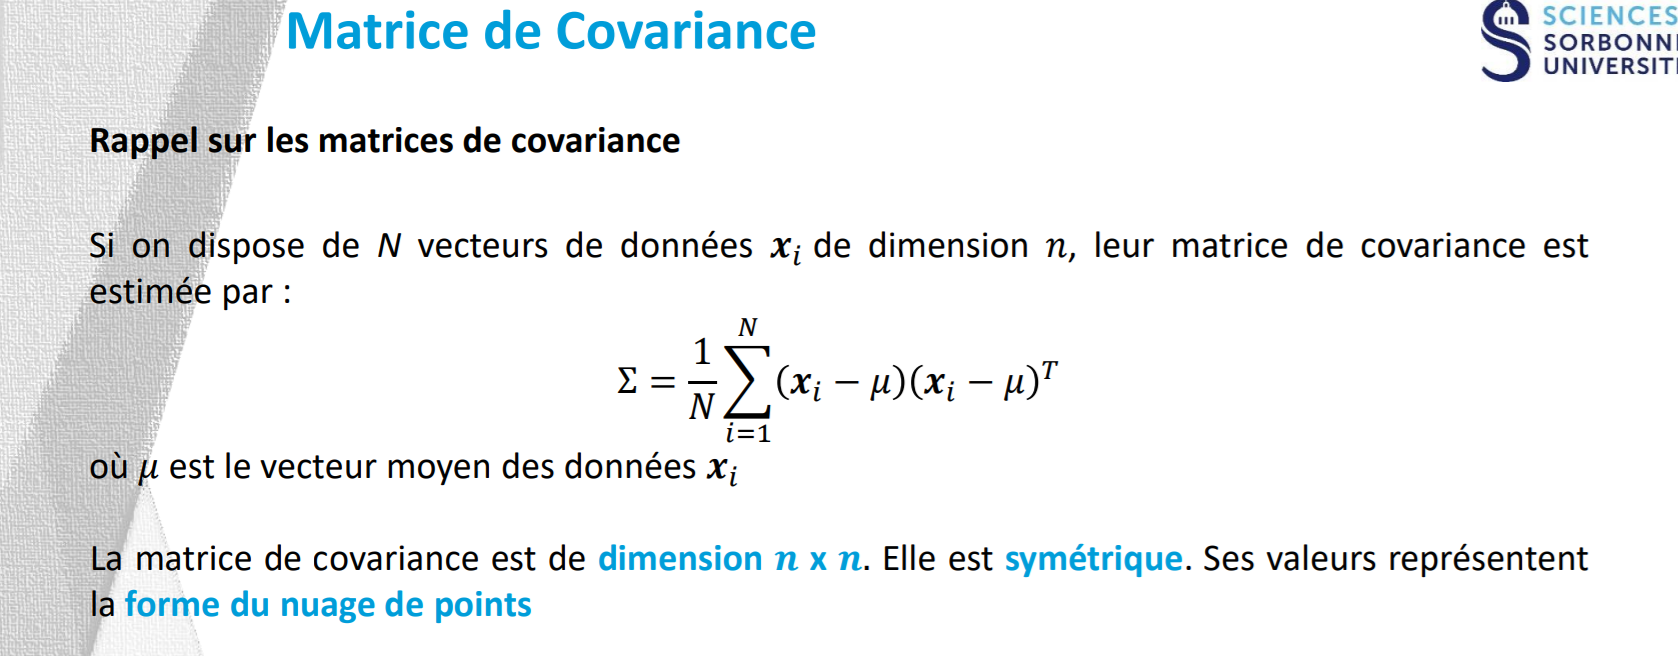

In [22]:
# Estimer 𝒎 et Σ la moyenne et la matrice de covariance sur les pixels de peau de la base d’apprentissage
# Pixels de peau : T_train

𝑚Cb = np.mean(T_train[:,0])  # moyennes  de la composante Cb
𝑚Cr = np.mean(T_train[:,1])  # moyennes  de la composante Cr
m = np.array([𝑚Cb, 𝑚Cr])  # Le vecteur moyen des données
#m = m=np.mean(T_train,axis=0)

print("Le vecteur moyen des donnés : ",m)
print("--------------------------------------")
# La matrice de covariance est de dimension 𝒏 x 𝒏. Elle est symétrique. Ses valeurs représentent la forme du nuage de points

# Syntax: numpy.cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None)
# Parameters:  m : [array_like] A 1D or 2D variables. variables are columns 
# Transpose the T_train

Sigma = np.cov(np.transpose(T_train))
print("La matrice de covariance : \n",Sigma)
print("\n--------------------------------------")

# Calcul de la probablité en chaque point xi de p1_train
p2_train = []
for i in range(T_train.shape[0]):
  p2_train.append(norm2(T_train[i],m,Sigma))

#print("p2_train = ",p2_train)

Le vecteur moyen des donnés :  [104.29577465 155.19405321]
--------------------------------------
La matrice de covariance : 
 [[ 82.35595391 -89.32551106]
 [-89.32551106 134.94974514]]

--------------------------------------


In [23]:
# On estime la probabilité sur les points de test
p2_test=[]
for i in range(np.size(X_test,0)):
  p2_test.append(norm2(X_test[i],m,Sigma))

#print(p2_test)

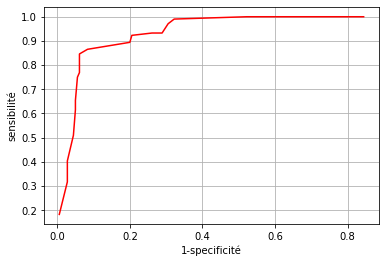

[1.0, 1.0, 0.9903846153846154, 0.9711538461538461, 0.9326923076923077, 0.9326923076923077, 0.9230769230769231, 0.8942307692307693, 0.8653846153846154, 0.8653846153846154, 0.8461538461538461, 0.8365384615384616, 0.7692307692307693, 0.75, 0.6538461538461539, 0.6153846153846154, 0.5096153846153846, 0.40384615384615385, 0.3173076923076923, 0.18269230769230768]


In [24]:
NB = 20
step = (np.max(p2_train) - np.min(p2_train) ) / NB
SEUILS = np.arange (np.min(p2_train), np.max(p2_train), step)

sensibiliteTab = [] 
specificiteTab = []

# Estimate + binarize + compute the confusion metrix and classification metrics for each threshold
for seuil in SEUILS:
  y_predicted = classifyData(p2_test,seuil)
  [TP,FN,FP,TN] = cf_matrix(y_test, y_predicted)
  #print(TP,FN,FP,TN)
  accuracy, presicion, recall, sensibilite, specificite = ComputeClassifMetrics(TP,FN,FP,TN)
  # Append to array 
  sensibiliteTab.append(sensibilite)
  specificiteTab.append(specificite)

# Compute de 1- specificity for ROC curve
for i in range(np.size(specificiteTab,0)):
  specificiteTab[i]=1-specificiteTab[i]

# Plot the ROC curve
plt.plot(specificiteTab,sensibiliteTab,'r')
plt.xlabel("1-specificité")
plt.ylabel("sensibilité")
plt.grid()
plt.show()

print(sensibiliteTab)
